In [ ]:
!pip install scipy==1.1.0

     |████████████████████████████████| 31.2MB 128kB/s 
ERROR: pymc3 3.11.2 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: plotnine 0.6.0 has requirement scipy>=1.2.0, but you'll have scipy 1.1.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from __future__ import print_function
import os
import cv2
import keras
#It “serializes” the object first before writing it to file
import pickle 
import numpy as np
# import variables as vars
import matplotlib.pyplot as plt
# allows you to create models layer-by-layer
from keras.models import Sequential
#Provides the ability to describe any model using JSON format
from keras.models import model_from_json
from keras.layers import Conv2D, MaxPooling2D
# Encode target labels with value between 0 and n_classes-1
from sklearn.preprocessing import LabelEncoder
from scipy.misc import imread, imresize, imshow
from keras.layers import Dense, Dropout, Flatten
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
img_rows, img_cols = 256, 256
 
#number of training examples utilized in one iteration
batch_size = 7
# 4 difference characters
num_classes = 4
# very short training time
epochs = 100
 
 
model_json_path = 'model_files/model.json'
label_obj_path = 'model_files/labels.sav'
model_path = 'model_files/model.h5'
prediction_file_dir_path =  '/content/drive/MyDrive/Data/predict_this_doc'
img_rows, img_cols = img_rows,img_cols
batch_size =batch_size
num_classes =num_classes
epochs = epochs
model_json_path =model_json_path
model_path = model_path
prediction_file_dir_path =prediction_file_dir_path
 
path = '/content/drive/MyDrive/Data/FEATURE-BASED-IMAGES'
 
data = []
labels_idx = {"LEFT_MARG":0,"RIGHT_MARG":1,"SLANT_ASC":2,"SLANT_DESC":4}
labels = []
 
#pre-processing is done on every single iamge and stored into 'data'
for folder, subfolders, files in os.walk(path):
  print(folder,subfolders)
  for name in files:
    if name.endswith('.jpg'):
      # Pre-processing the images
      x = cv2.imread(folder + '/' + name, cv2.IMREAD_GRAYSCALE)
      x = cv2.resize(x, (img_rows, img_cols))
      __, x = cv2.threshold(x, 150, 150, cv2.THRESH_BINARY)
 
      # dilate
      morph_size = (2, 2)
      cpy = x.copy()
      # To get a desired rectangular kernel size of 2*2 array
      struct = cv2.getStructuringElement(cv2.MORPH_RECT, morph_size)
      # Dilating the image 
      cpy = cv2.dilate(~cpy, struct, anchor=(-1, -1), iterations=1)
      x = ~cpy
 
      # x = np.expand_dims(x, axis=0)
 
      data.append(x)
 
      # cv2.imwrite(str(name) + '00986.jpg', x)
      labels.append(labels_idx[os.path.basename(folder)])

/content/drive/MyDrive/Data/FEATURE-BASED-IMAGES ['SLANT_DESC', 'LEFT_MARG', 'SLANT_ASC', 'RIGHT_MARG']
/content/drive/MyDrive/Data/FEATURE-BASED-IMAGES/SLANT_DESC []
/content/drive/MyDrive/Data/FEATURE-BASED-IMAGES/LEFT_MARG []
/content/drive/MyDrive/Data/FEATURE-BASED-IMAGES/SLANT_ASC []
/content/drive/MyDrive/Data/FEATURE-BASED-IMAGES/RIGHT_MARG []


In [ ]:
# print(labels)
# labels1 = np.asarray(labels)
# labels1=labels1.reshape(28,1)
# print(labels1.shape)
# convert array of labeled data to one-hot-encoding
from keras.utils.np_utils import to_categorical 
# labels1 = to_categorical(labels, num_classes = 4)
lb = LabelEncoder()
#converting the labels into numeric form so as to convert it into the machine-readable form
labels = lb.fit_transform(labels)
#Converts a class vector (integers) to binary class matrix
labels1 = to_categorical(labels, num_classes = 4)

print(labels1.shape)
#print(labels1)

(198, 4)


In [ ]:
data1 = np.asarray(data)
labels1[4]

array([0., 0., 0., 1.], dtype=float32)

In [ ]:

x_train, x_test, y_train, y_test = train_test_split(data1, labels1, random_state=2, test_size=0.5,shuffle=True)
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255.0
x_test /= 255.0


input_shape = (img_rows, img_cols,1)

In [ ]:
x_train=np.reshape(x_train, x_train.shape + (1,))

In [ ]:
x_test=np.reshape(x_test, x_test.shape + (1,))

In [ ]:
print(x_train.shape)

(99, 256, 256, 1)


In [ ]:
print(y_train.shape)

(99, 4)


In [ ]:
print(y_test.shape)

(99, 4)


In [ ]:
print(x_test.shape)

(99, 256, 256, 1)


In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
# output a softmax to squash the matrix into output probabilities
model.add(Dense(num_classes, activation='softmax'))

In [ ]:

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])
# lb = LabelEncoder()
# y_train = lb.fit_transform(y_train)
# y_test = lb.fit_transform(y_test)
# y_train = keras.utils.to_categorical(y_train)
# y_test = keras.utils.to_categorical(y_test)
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

# lda = LDA(n_components=1)
# X_train = lda.fit_transform(X_train, y_train)
# X_test = lda.transform(X_test)


history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=2,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/100
15/15 - 45s - loss: 1.3829 - accuracy: 0.3232 - val_loss: 1.3486 - val_accuracy: 0.3131
Epoch 2/100
15/15 - 48s - loss: 1.3592 - accuracy: 0.3434 - val_loss: 1.3850 - val_accuracy: 0.2323
Epoch 3/100
15/15 - 42s - loss: 1.3363 - accuracy: 0.3636 - val_loss: 1.3452 - val_accuracy: 0.3232
Epoch 4/100
15/15 - 44s - loss: 1.3386 - accuracy: 0.3434 - val_loss: 1.4085 - val_accuracy: 0.2323
Epoch 5/100
15/15 - 44s - loss: 1.3258 - accuracy: 0.3737 - val_loss: 1.3509 - val_accuracy: 0.2626
Epoch 6/100
15/15 - 44s - loss: 1.3149 - accuracy: 0.3636 - val_loss: 1.4195 - val_accuracy: 0.2323
Epoch 7/100
15/15 - 44s - loss: 1.2947 - accuracy: 0.3737 - val_loss: 1.3102 - val_accuracy: 0.3939
Epoch 8/100
15/15 - 43s - loss: 1.2918 - accuracy: 0.4343 - val_loss: 1.3501 - val_accuracy: 0.3232
Epoch 9/100
15/15 - 44s - loss: 1.3243 - accuracy: 0.3838 - val_loss: 1.3367 - val_accuracy: 0.3232
Epoch 10/100
15/15 - 44s - loss: 1.2696 - accuracy: 0.3939 - val_loss: 1.3080 - val_accuracy: 0.3434

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

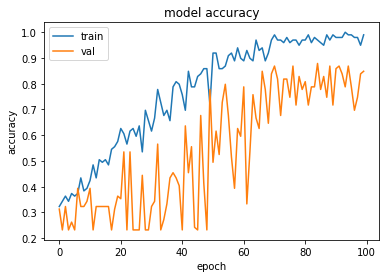

In [ ]:
# loss_train = history.history['accuracy']
# loss_val = history.history['val_accuracy']
# epochs = range(1,100)
# plt.title('model accuracy')
# plt.ylabel('accuracy')
# plt.xlabel('epoch')
# plt.legend(['train', 'validation'], loc='upper left')
# plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
from keras.models import load_model
from keras.models import Model
import json 
# we can save our Keras models to file and load them up again to make predictions.
# Keras provides the ability to describe any model using JSON format
model_json = model.to_json() 
model_json_path = '/content/drive/MyDrive/Data/models/model.json'                         
with open(model_json_path, "w") as json_file:
  json_file.write(model_json)

 
# it is used to save files and data,
label_obj_path = '/content/drive/MyDrive/Data/models/labels.sav'
 
# The weights are saved directly from the model and later loaded using the function.
model_path = '/content/drive/MyDrive/Data/models/model.h5'
 
prediction_file_dir_path = '/content/drive/MyDrive/Data/right'
 
# pickle label encoder obj
# The most commonly used ones are Label Encoding (where a list of strings is converted to a list of numbers but still remains one list) 
with open(label_obj_path, 'wb') as lb_obj:
# dump() function to store the object data to the file. pickle.
# The first argument is the object that you want to store. The second argument is the file object you get by opening the desired file.
  pickle.dump(lb, lb_obj)
 
# serialize weights to HDF5
model.save_weights(model_path)
print("Saved model to disk")

Saved model to disk


In [ ]:
def print_results(lbl):
  if lbl == 'LEFT_MARG':
    print('\n > Flexibility :')
    # print('\n > Insecure and devotes oneself completely :\t')
  elif lbl == 'RIGHT_MARG':
    print('\n > social isolation :\t')
  elif lbl == 'SLANT_ASC':
    print('\n > Mental Energy :')
  elif lbl == 'SLANT_DESC':
    print('\n > Non communicative :')


In [ ]:
import os
import cv2
from scipy.misc import imread, imresize, imshow
import warnings
warnings.filterwarnings("ignore")

output_idx = {0:"LEFT_MARG",1:"RIGHT_MARG",2:"SLANT_ASC",3:"SLANT_DESC",4:"NEWDATA"}
def predict_personalities(filename):

  # try:
  json_file = open(model_json_path, 'r')
  loaded_model_json = json_file.read()
  json_file.close()

  from keras.models import model_from_json
  loaded_model = model_from_json(open(model_json_path).read())
  # load woeights into new model
  loaded_model.load_weights(model_path)
  print("*****Loaded Model from disk******")
# except Exception:
  # return '\n\n> Need to train the model first!\n'
  prediction_file_dir_path =  '/content/drive/MyDrive/Data/right/'

  x = cv2.imread(prediction_file_dir_path+filename, cv2.IMREAD_GRAYSCALE)
  x = cv2.resize(x, (img_rows, img_cols))
  __, x = cv2.threshold(x, 150, 150, cv2.THRESH_BINARY)
  # x = cv2.imresize(x, (img_rows, img_cols))
  # x = imresize(x, (img_rows, img_cols))
  # __, x = cv2.threshold(x, 220, 255, cv2.THRESH_BINARY)

  # dilate
  # Increases the object area,Used to accentuate features means noticeable
  morph_size = (2, 2)
  cpy = x.copy()
  struct = cv2.getStructuringElement(cv2.MORPH_RECT, morph_size)
  cpy = cv2.dilate(~cpy, struct, anchor=(-1, -1), iterations=1)
  x = ~cpy
  
  x=np.reshape(x, (1, 256, 256, 1))
# x_train = x_train.reshape(-1, 28, 28, 1)
  #print(x.shape)
  #x = np.expand_dims(x, axis=4)

  # x = np.expand_dims(x, axis=0)
  out = loaded_model.predict(x, batch_size=32, verbose=0)

# The numpy.argmax() function returns indices of the max element of the array in a particular axis.
  print_results((output_idx[np.argmax(out[0])]))

  # with open(label_obj_path, 'rb') as lb_obj:
  #   lb = pickle.load(lb_obj)

  # result = lb.inverse_transform(np.argmax(out[0]))
  # print_results(lb.classes_, out[0])

  #return '\n> Prediction Completed!'


if __name__ == '__main__':
  fpath = None
  prediction_file_dir_path =  '/content/drive/MyDrive/Data/right'
  # for dir_0, sub_dir_0, files in os.walk(prediction_file_dir_path):
  # # for folder, subfolders, files in os.walk(prediction_file_dir_path):
  #   fpath = files
  #   break
  # if fpath:
  res = predict_personalities('test3.jpg')
  
  # else:
    # print('No file found for prediction!')


*****Loaded Model from disk******

 > social isolation :	
